In [12]:
import pandas as pd
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('data (3).csv')
df2= pd.read_csv('music.csv')

In [7]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


/Users/julietang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/julietang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/julietang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

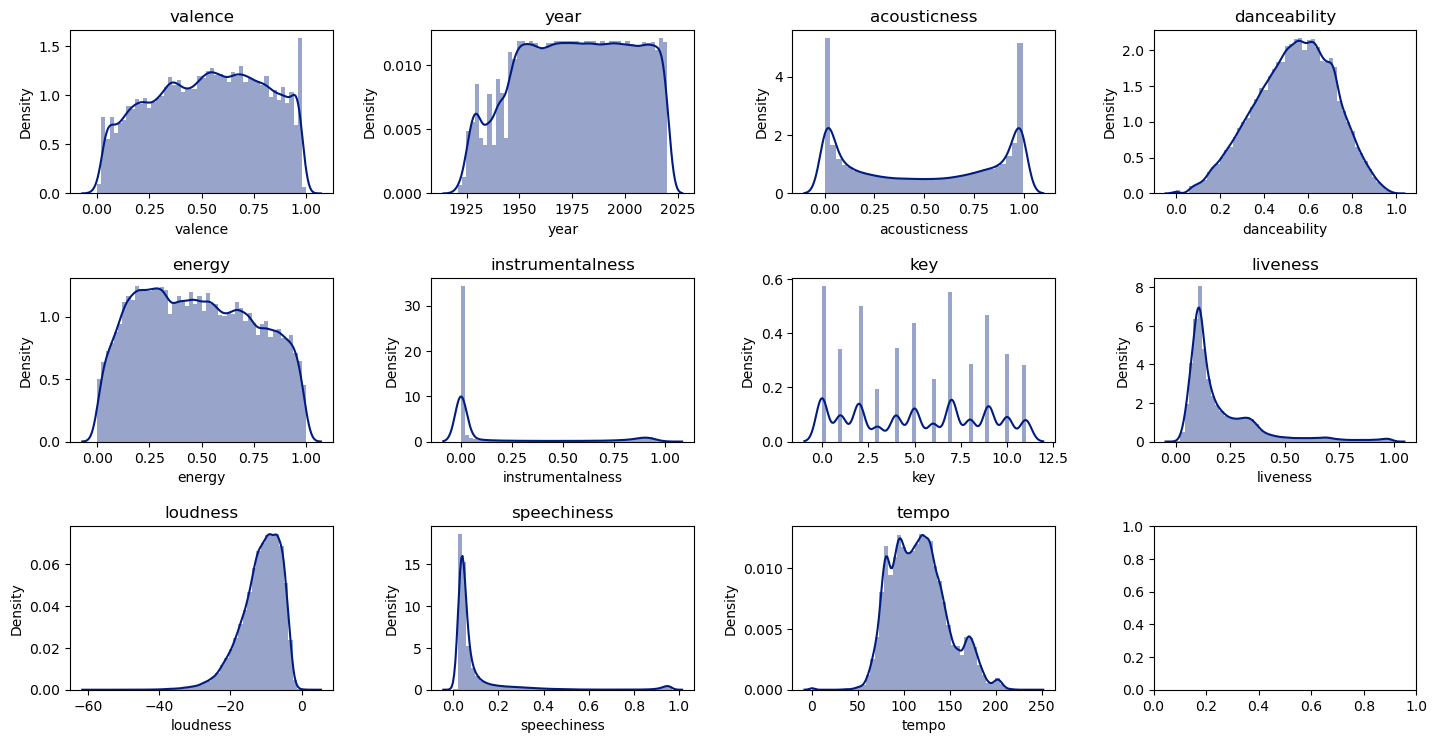

In [35]:
#for data csv with 180k Songs

# Gather categories
cats = ['valence', 'year', 'acousticness', 'danceability', 'energy',
        'instrumentalness', 'key', 'liveness', 'loudness',
        'speechiness', 'tempo']

# Calculate the number of rows and columns for the subplots
n_rows = 3
n_cols = (len(cats) + n_rows - 1) // n_rows

# Create subplots for the distplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
fig.tight_layout(pad=4)

# Flatten the axes array if necessary
if n_rows > 1:
    axes = axes.flatten()

# Plot the distplots for each category
for i, col in enumerate(cats):
    sns.distplot(df[col], ax=axes[i])
    axes[i].set_title(col)

plt.show()



In [21]:
#find top 10 songs by popularity
df.groupby("name")['popularity'].mean().sort_values(ascending=False).head(10)


name
Dakiti                             100.0
Mood (feat. iann dior)              99.0
What You Know Bout Love             96.0
WAP (feat. Megan Thee Stallion)     96.0
Blinding Lights                     96.0
Holy (feat. Chance The Rapper)      95.0
Lonely (with benny blanco)          95.0
you broke me first                  95.0
Relación - Remix                    94.0
Head & Heart (feat. MNEK)           94.0
Name: popularity, dtype: float64

/Users/julietang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/julietang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/julietang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

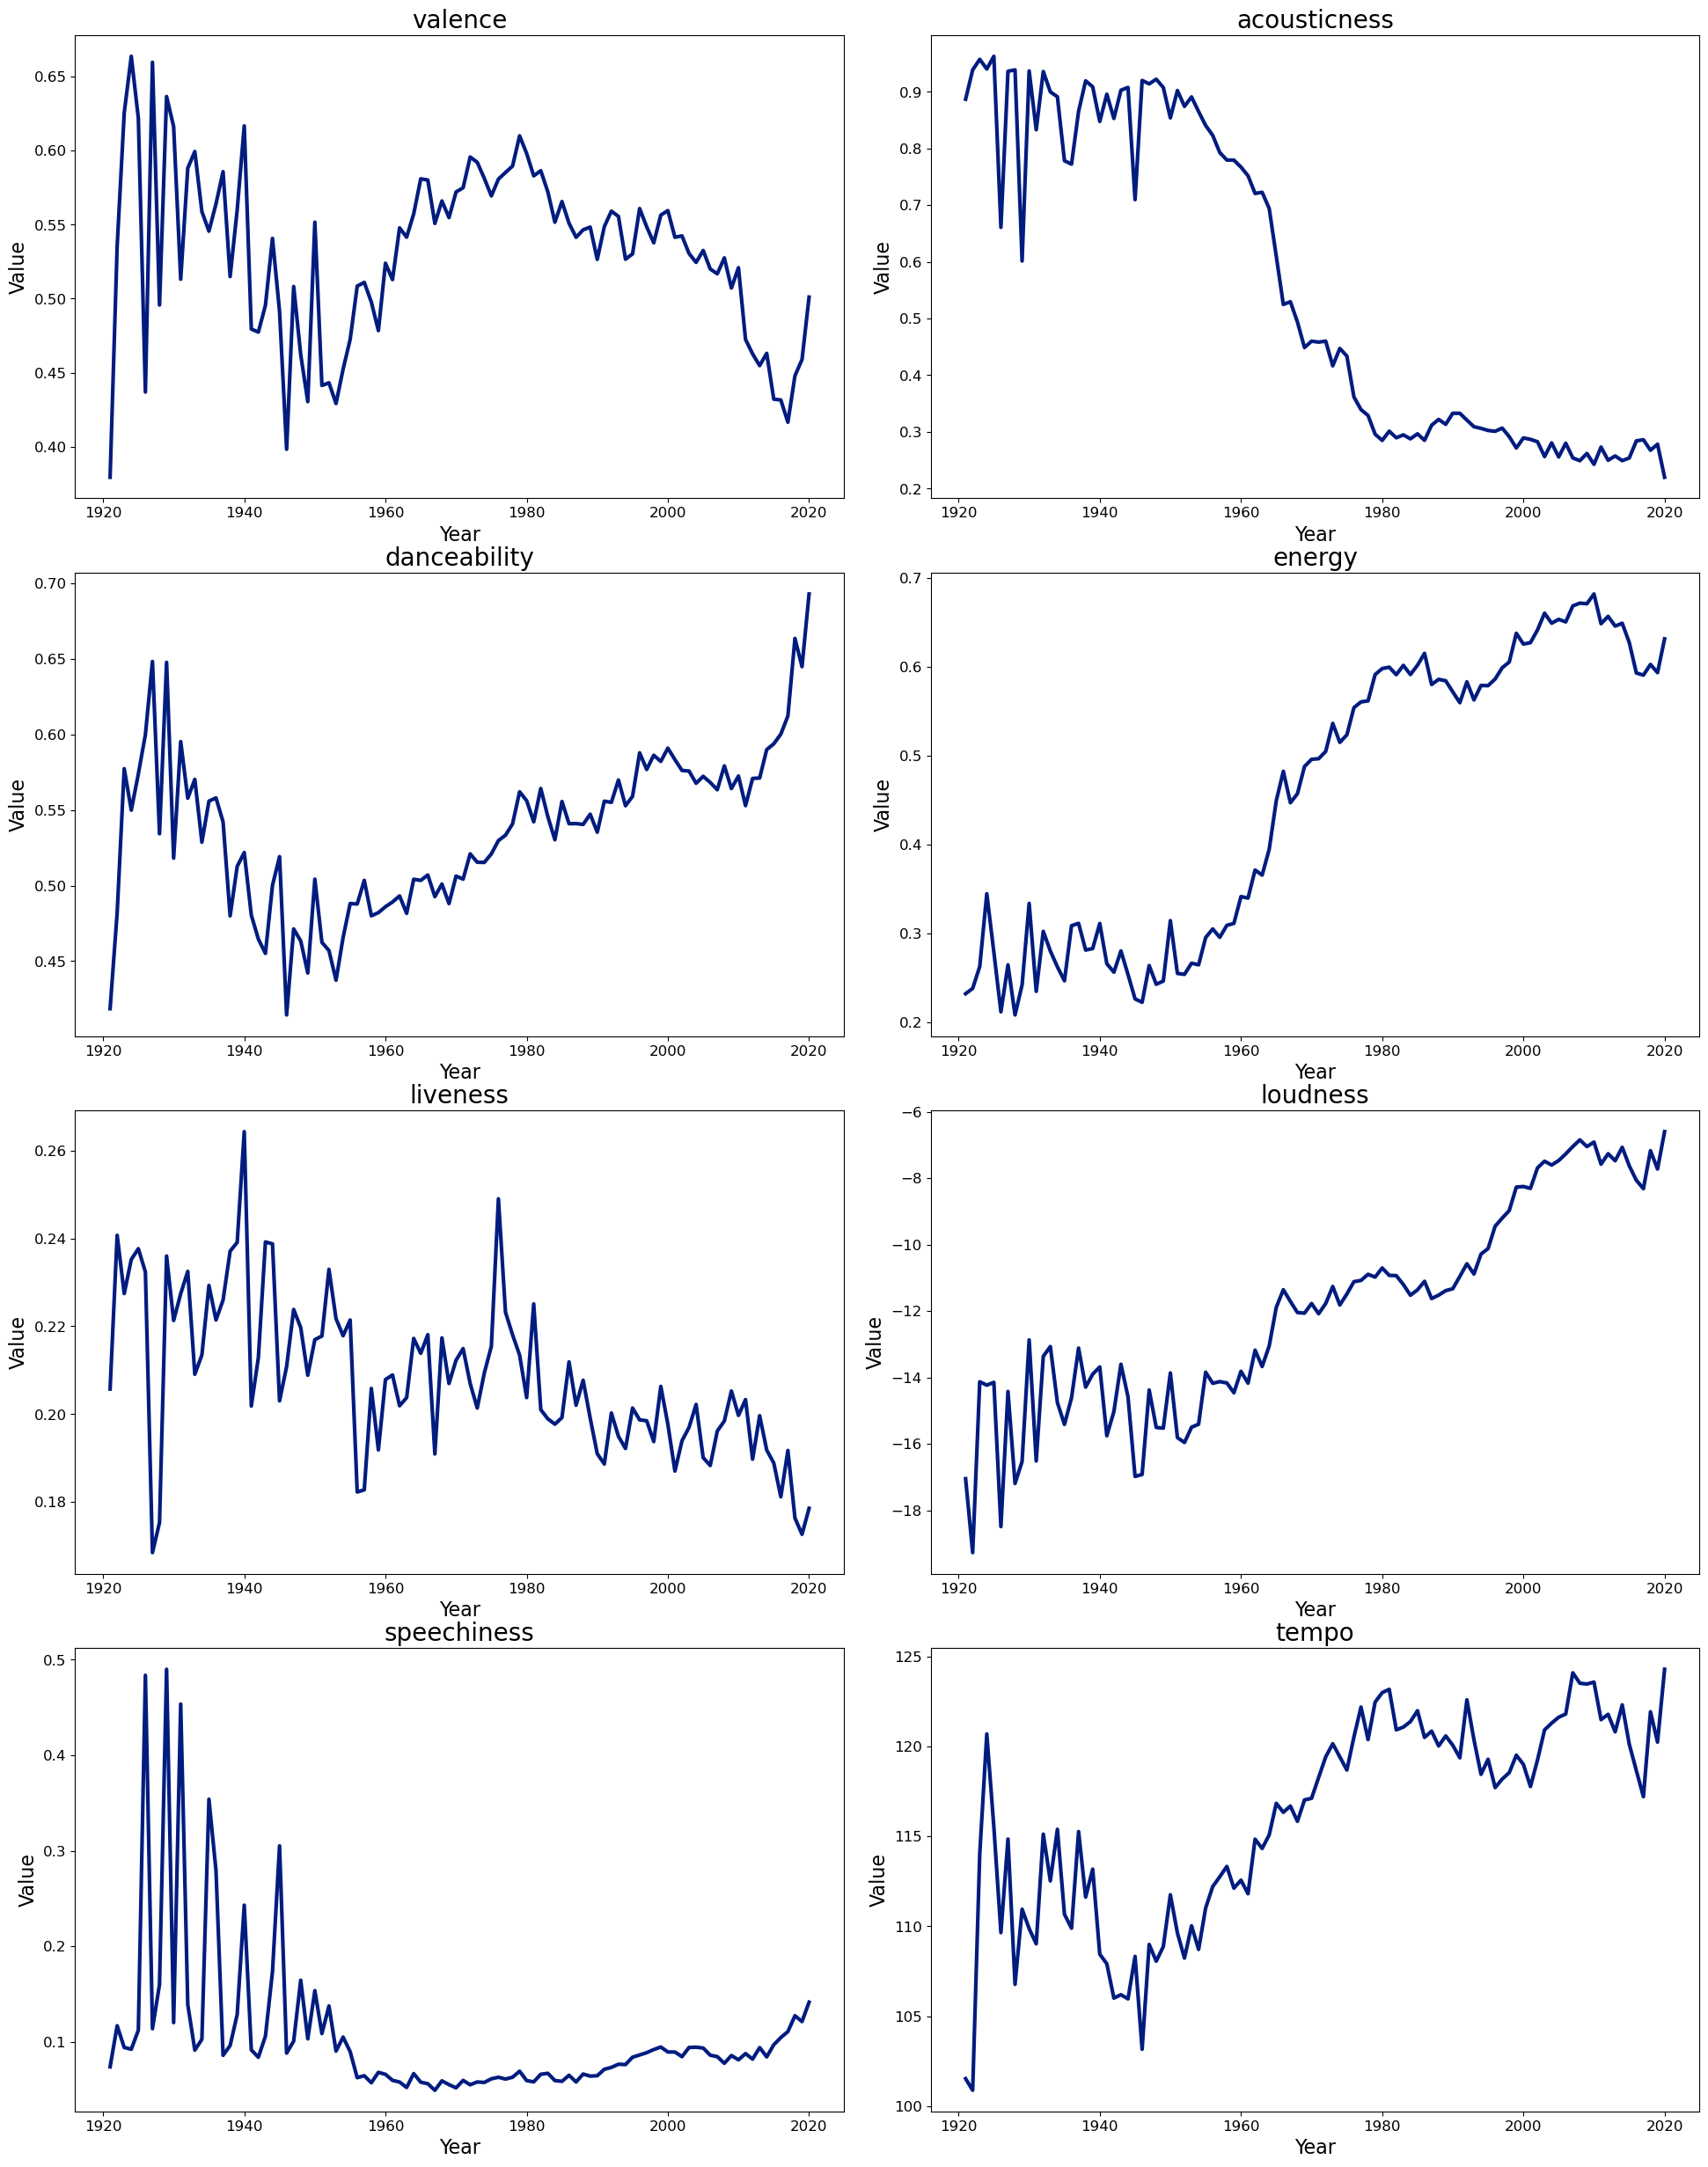

In [51]:
#dark color for visability 
sns.set_palette("dark")

columns = ['valence', 'acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'speechiness', 'tempo']

#number of rows and columns for subplots
n_rows = 4
n_cols = 2

#Create subplots for each characteristic
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 25))
fig.tight_layout(pad=4)


axes = axes.flatten()

#separate subplot
for i, col in enumerate(columns):
    ax = axes[i]
    x = df.groupby('year')[col].mean()
    sns.lineplot(x.index, x, ax=ax, linewidth=3)
    ax.set_title(col, fontsize=20)
    ax.set_xlabel('Year', fontsize=16)
    ax.set_ylabel('Value', fontsize=16)
    ax.tick_params(axis='both', labelsize=12)


plt.show()



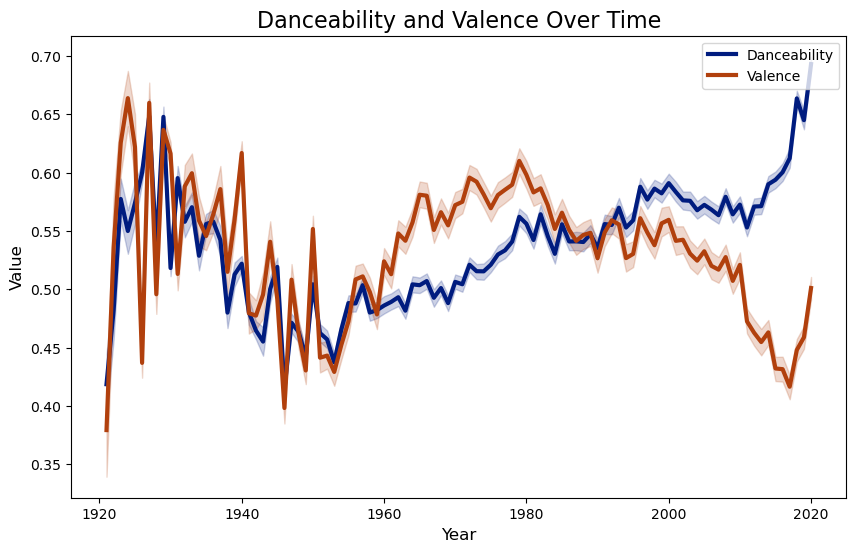

In [45]:
#Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot 'valence' over time
sns.lineplot(x='year', y='danceability', data=df, ax=ax, linewidth=3, label='Danceability')

# Plot 'popularity' over time
sns.lineplot(x='year', y='valence', data=df, ax=ax, linewidth=3, label='Valence')

#title and labels
ax.set_title('Danceability and Valence Over Time', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Value', fontsize=12)

#legend
ax.legend(loc='upper right')

# Show the plot
plt.show()




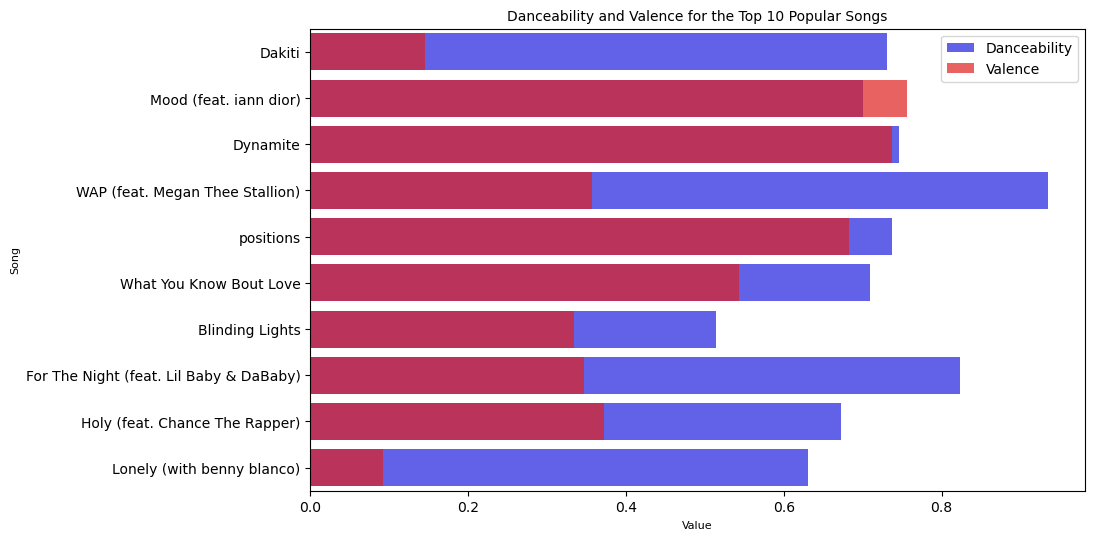

In [50]:
#top 10 most popular
top_10_popular_songs = df.nlargest(10, 'popularity')

#fig/axes
fig, ax = plt.subplots(figsize=(10, 6))

#danceability for top 10
sns.barplot(x='danceability', y='name', data=top_10_popular_songs, ax=ax, color='blue', alpha=0.7, label='Danceability')

#valence for top 10
sns.barplot(x='valence', y='name', data=top_10_popular_songs, ax=ax, color='red', alpha=0.7, label='Valence')

#title and labels
ax.set_title('Danceability and Valence for the Top 10 Popular Songs', fontsize=10)
ax.set_xlabel('Value', fontsize=8)
ax.set_ylabel('Song', fontsize=8)

#legend
ax.legend(loc='upper right')


plt.show()

